## `Data Vipers`

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
def get_date (ts):
    return ts.date()

def get_month (ts):
    return ts.month

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

def get_minute (ts):
    return ts.minute

def calc_distances(start_point,end_point):
    return geopy.distance.geodesic( start_point, end_point ).km

def calc_durations(end_time,start_time):
    return (end_time - start_time).total_seconds()

def getTrueWeekday(weekday_start,day):
    return (weekday_start == day)

In [3]:
df = pd.read_csv("../boston_2016_distance_duration_speed.csv")
df["start_time"] = pd.to_datetime(df["start_time"],format="%Y-%m-%d %H:%M:%S") # FORMAT %Y-%m-%d %H:%M:%S beachte - und :
df["end_time"] = pd.to_datetime(df["end_time"],format="%Y-%m-%d %H:%M:%S")

In [4]:
print(len(df["bike_id"].unique()))

1800


In [5]:
print(len(df["start_station_name"].unique()))

274


In [6]:
df2 = pd.read_csv("../all_station_id_with_amounts.csv")

In [86]:
pd.set_option('display.max_columns', None)

In [8]:
#Daten von BlueBikes

# df_bluebikes_01 = pd.read_csv("201601-hubway-tripdata.csv")
# df_bluebikes_02 = pd.read_csv("201602-hubway-tripdata.csv")
# df_bluebikes_03 = pd.read_csv("201603-hubway-tripdata.csv")
# df_bluebikes_04 = pd.read_csv("201604-hubway-tripdata.csv")
# df_bluebikes_05 = pd.read_csv("201605-hubway-tripdata.csv")
# df_bluebikes_06 = pd.read_csv("201606-hubway-tripdata.csv")
# df_bluebikes_07 = pd.read_csv("201607-hubway-tripdata.csv")
# df_bluebikes_08 = pd.read_csv("201608-hubway-tripdata.csv")
# df_bluebikes_09 = pd.read_csv("201609-hubway-tripdata.csv")
# df_bluebikes_10 = pd.read_csv("201610-hubway-tripdata.csv")
# df_bluebikes_11 = pd.read_csv("201611-hubway-tripdata.csv")
# df_bluebikes_12 = pd.read_csv("201612-hubway-tripdata.csv")

In [9]:
#Daten von Bluebikes MeRgEd

# df_bluebikes_all = pd.concat([df_bluebikes_01, 
#                             df_bluebikes_02,
#                             df_bluebikes_03,
#                             df_bluebikes_03,
#                             df_bluebikes_04,
#                             df_bluebikes_05,
#                             df_bluebikes_06,
#                             df_bluebikes_07,
#                             df_bluebikes_08,
#                             df_bluebikes_09,
#                             df_bluebikes_10,
#                             df_bluebikes_11,
#                             df_bluebikes_12], axis=0)

In [10]:
# print(len(df_bluebikes_all["start station id"].unique()))

In [11]:
#Unique Cords exportiert

# df_bluebikes_all.drop(['tripduration','starttime','stoptime','end station id', 'end station name', 'end station latitude','end station longitude', 'bikeid', 'usertype', 'birth year','gender'], axis=1, inplace=True)
# df_bluebikes_all.sort_values(["start station id"],axis=0, ascending=True,inplace=True,na_position='first')
# df_bluebikes_all = df_bluebikes_all.drop_duplicates(subset=['start station id'])
# filepath = Path('C:/Users/rfrei/Desktop/all_station_id.csv')
# filepath.parent.mkdir(parents=True, exist_ok=True)
# df_bluebikes_all.to_csv(filepath)

In [12]:
#BlueBikes Station_ID einlesen

#all_station_id = pd.read_csv("all_station_id.csv")

In [13]:
#ID's der einzelnen Stations werden als Float - Platzhalter den jeweiligen Routen hinzugefügt, damit
#diese dann anschließend mit 'Lat' und 'Long' Coords ersetzt werden können

df["start_lat"] = pd.to_numeric(df["start_station_id"], downcast="float")
df["start_long"] = pd.to_numeric(df["start_station_id"], downcast="float")
df["end_lat"] = pd.to_numeric(df["end_station_id"], downcast="float")
df["end_long"] = pd.to_numeric(df["end_station_id"], downcast="float")

In [14]:
#Hier werden die Float - Platzhalter dann mit den jeweiligen Cords ersetzt

In [15]:
df['start_lat'] = df['start_lat'].replace([1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,145,146,149,150,151,152,153,158,159,160,161,162,163,167,169,170,171,173,174,175,176,177,178,179,180,183,184,185,186,189,190,192,193,194,195,196,197,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219],[42.387151,42.340021,42.345392,42.341814,42.361174,42.35328743453294,42.353334,42.351246,42.350406,42.338629,42.335911,42.336437,42.337171,42.361667,42.34807412317439,42.365064,42.347241,42.35977,42.345959,42.352175,42.35892,42.351205,42.341332,42.341522,42.331184,42.363732,42.334073,42.348833,42.34519428944095,42.348706,42.355402,42.349673,42.357402,42.366222,42.33849279283789,42.363871,42.352261,42.352033,42.357143,42.360613,42.344706,42.343864,42.362811,42.356755,42.351146,42.350989,42.3348756,42.34872432400896,42.350851,42.354979,42.347265,42.328654,42.340799,42.355596,42.351356,42.360624982690496,42.348762,42.344023,42.3511,42.3475,42.348607,42.3581,42.36507,42.341598,42.37199165408676,42.383405,42.362613,42.373231,42.373268,42.36346469304347,42.366426,42.386844,42.379637,42.37842,42.3619622,42.352409,42.339335,42.366981,42.378338,42.366621,42.374035,42.379011,42.370677,42.366277,42.3139036,42.320494,42.375603,42.372969,42.373379,42.36919031768079,42.371848,42.385582,42.396969,42.400877,42.346563,42.380287,42.357218503176526,42.325333,42.3625,42.377945,42.36588481543564,42.376369,42.40449,42.39082,42.330716,42.402763,42.387995,42.370803,42.366095,42.397828,42.335741,42.356052,42.335693,42.345733,42.309054,42.320998,42.315692,42.320561,42.377022,42.31756858003556,42.322701,42.310579,42.350413,42.344827,42.344796,42.398365,42.326599,42.361589,42.388966,42.36356015842989,42.396105,42.369885,42.392766,42.336448,42.363796,42.344137,42.358155,42.345901,42.3601,42.3601,42.32797270205962,42.337596,42.3391085,42.309796,42.344792,42.317642,42.378965,42.303469,42.37408991426522,42.310599,42.34900494405213,42.34894857235593,42.38674802045056,42.36264779118595,42.35957320109044,42.35560121327927,42.37478628706384,42.39558845716709,42.35775309465199,42.36544486137399,42.3482032222746,42.3624278429124,42.36559770612416,42.354686,42.33289074055233,42.38614141163957,42.3720597013741,42.31787329345602,42.321678,42.31884382360106,42.33282815812448,42.316873,42.308035,42.309566,42.324069,42.30791912678712,42.35480179069945,42.35057,42.37980321246644,42.38337841883669,42.36489045541549,42.3688385713652,42.369562869377,42.37536686015489,42.37078454600501,42.38244736415864,42.38673178529929,42.351586001198456,42.37430131617823])

In [16]:
df['start_long'] = df['start_long'].replace([1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,145,146,149,150,151,152,153,158,159,160,161,162,163,167,169,170,171,173,174,175,176,177,178,179,180,183,184,185,186,189,190,192,193,194,195,196,197,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219],[-71.075978,-71.100812,-71.069616,-71.090179,-71.065142,-71.04438900947571,-71.137313,-71.115639,-71.108279,-71.1065,-71.088496,-71.073089,-71.102797,-71.13802,-71.07657015323639,-71.119233,-71.105301,-71.051601,-71.082578,-71.055547,-71.057629,-71.043983,-71.076847,-71.068922,-71.095171,-71.124565,-71.105221,-71.041747,-71.1016970872879,-71.097009,-71.058087,-71.077303,-71.147782,-71.059914,-71.07401937246323,-71.050877,-71.123831,-71.070627,-71.050699,-71.057452,-71.097515,-71.085918,-71.056067,-71.055407,-71.066289,-71.073644,-71.0790969,-71.08583986759186,-71.089886,-71.063348,-71.088088,-71.084198,-71.081572,-71.07278,-71.059367,-71.0708999633789,-71.082383,-71.057054,-71.0496,-71.0441,-71.13401,-71.093198,-71.1031,-71.123338,-71.12226963043213,-71.107593,-71.084105,-71.120886,-71.118579,-71.10057324171066,-71.105495,-71.09812,-71.095319,-71.105668,-71.0920526,-71.062679,-71.13493,-71.076472,-71.048927,-71.114214,-71.101427,-71.119945,-71.076529,-71.09169,-71.0405121,-71.051122,-71.064608,-71.094445,-71.111075,-71.11714124679565,-71.060292,-71.113341,-71.123024,-71.116772,-71.128374,-71.125107,-71.1138716340065,-71.075354,-71.08822,-71.116865,-71.06454849243164,-71.114025,-71.123413,-71.10942,-71.057044,-71.126908,-71.119084,-71.104412,-71.086388,-71.130516,-71.03877,-71.069849,-71.045859,-71.100694,-71.11543,-71.110833,-71.098634,-71.06198,-71.056605,-71.06403708501603,-71.099533,-71.107341,-71.07655,-71.028664,-71.031614,-71.107818,-71.066498,-71.107437,-71.132788,-71.08216792345047,-71.139459,-71.069957,-71.129042,-71.023739,-71.129164,-71.052608,-71.052163,-71.063187,-71.0589,-71.0589,-71.11089706420898,-71.096391,-71.0514432,-71.092225,-71.044024,-71.056664,-71.068607,-71.085347,-71.06905996799469,-71.053927,-71.1604106426239,-71.15027189254761,-71.11901879310608,-71.10006093978882,-71.10129475593567,-71.10394477844238,-71.13320231437683,-71.14260613918304,-71.10393404960632,-71.08277142047882,-71.0376513004303,-71.08495473861694,-71.06424808502197,-71.053292,-71.11658334732056,-71.07828140258789,-71.07202649116516,-71.08243077993393,-71.091822,-71.06975734233856,-71.08126938343048,-71.091955,-71.081159,-71.072863,-71.083162,-71.06502056121826,-71.15025043487549,-71.166491,-71.02744817733765,-71.01612031481636,-71.0350424052376,-71.03976666949166,-71.03942692279814,-71.03135883808136,-71.04426160454749,-71.0302323102951,-71.00621223455164,-71.04569256305693,-71.03808671246952])

In [17]:
df['end_lat'] = df['end_lat'].replace([1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,145,146,149,150,151,152,153,158,159,160,161,162,163,167,169,170,171,173,174,175,176,177,178,179,180,183,184,185,186,189,190,192,193,194,195,196,197,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219],[42.387151,42.340021,42.345392,42.341814,42.361174,42.35328743453294,42.353334,42.351246,42.350406,42.338629,42.335911,42.336437,42.337171,42.361667,42.34807412317439,42.365064,42.347241,42.35977,42.345959,42.352175,42.35892,42.351205,42.341332,42.341522,42.331184,42.363732,42.334073,42.348833,42.34519428944095,42.348706,42.355402,42.349673,42.357402,42.366222,42.33849279283789,42.363871,42.352261,42.352033,42.357143,42.360613,42.344706,42.343864,42.362811,42.356755,42.351146,42.350989,42.3348756,42.34872432400896,42.350851,42.354979,42.347265,42.328654,42.340799,42.355596,42.351356,42.360624982690496,42.348762,42.344023,42.3511,42.3475,42.348607,42.3581,42.36507,42.341598,42.37199165408676,42.383405,42.362613,42.373231,42.373268,42.36346469304347,42.366426,42.386844,42.379637,42.37842,42.3619622,42.352409,42.339335,42.366981,42.378338,42.366621,42.374035,42.379011,42.370677,42.366277,42.3139036,42.320494,42.375603,42.372969,42.373379,42.36919031768079,42.371848,42.385582,42.396969,42.400877,42.346563,42.380287,42.357218503176526,42.325333,42.3625,42.377945,42.36588481543564,42.376369,42.40449,42.39082,42.330716,42.402763,42.387995,42.370803,42.366095,42.397828,42.335741,42.356052,42.335693,42.345733,42.309054,42.320998,42.315692,42.320561,42.377022,42.31756858003556,42.322701,42.310579,42.350413,42.344827,42.344796,42.398365,42.326599,42.361589,42.388966,42.36356015842989,42.396105,42.369885,42.392766,42.336448,42.363796,42.344137,42.358155,42.345901,42.3601,42.3601,42.32797270205962,42.337596,42.3391085,42.309796,42.344792,42.317642,42.378965,42.303469,42.37408991426522,42.310599,42.34900494405213,42.34894857235593,42.38674802045056,42.36264779118595,42.35957320109044,42.35560121327927,42.37478628706384,42.39558845716709,42.35775309465199,42.36544486137399,42.3482032222746,42.3624278429124,42.36559770612416,42.354686,42.33289074055233,42.38614141163957,42.3720597013741,42.31787329345602,42.321678,42.31884382360106,42.33282815812448,42.316873,42.308035,42.309566,42.324069,42.30791912678712,42.35480179069945,42.35057,42.37980321246644,42.38337841883669,42.36489045541549,42.3688385713652,42.369562869377,42.37536686015489,42.37078454600501,42.38244736415864,42.38673178529929,42.351586001198456,42.37430131617823])

In [18]:
df['end_long'] = df['end_long'].replace([1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,145,146,149,150,151,152,153,158,159,160,161,162,163,167,169,170,171,173,174,175,176,177,178,179,180,183,184,185,186,189,190,192,193,194,195,196,197,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219],[-71.075978,-71.100812,-71.069616,-71.090179,-71.065142,-71.04438900947571,-71.137313,-71.115639,-71.108279,-71.1065,-71.088496,-71.073089,-71.102797,-71.13802,-71.07657015323639,-71.119233,-71.105301,-71.051601,-71.082578,-71.055547,-71.057629,-71.043983,-71.076847,-71.068922,-71.095171,-71.124565,-71.105221,-71.041747,-71.1016970872879,-71.097009,-71.058087,-71.077303,-71.147782,-71.059914,-71.07401937246323,-71.050877,-71.123831,-71.070627,-71.050699,-71.057452,-71.097515,-71.085918,-71.056067,-71.055407,-71.066289,-71.073644,-71.0790969,-71.08583986759186,-71.089886,-71.063348,-71.088088,-71.084198,-71.081572,-71.07278,-71.059367,-71.0708999633789,-71.082383,-71.057054,-71.0496,-71.0441,-71.13401,-71.093198,-71.1031,-71.123338,-71.12226963043213,-71.107593,-71.084105,-71.120886,-71.118579,-71.10057324171066,-71.105495,-71.09812,-71.095319,-71.105668,-71.0920526,-71.062679,-71.13493,-71.076472,-71.048927,-71.114214,-71.101427,-71.119945,-71.076529,-71.09169,-71.0405121,-71.051122,-71.064608,-71.094445,-71.111075,-71.11714124679565,-71.060292,-71.113341,-71.123024,-71.116772,-71.128374,-71.125107,-71.1138716340065,-71.075354,-71.08822,-71.116865,-71.06454849243164,-71.114025,-71.123413,-71.10942,-71.057044,-71.126908,-71.119084,-71.104412,-71.086388,-71.130516,-71.03877,-71.069849,-71.045859,-71.100694,-71.11543,-71.110833,-71.098634,-71.06198,-71.056605,-71.06403708501603,-71.099533,-71.107341,-71.07655,-71.028664,-71.031614,-71.107818,-71.066498,-71.107437,-71.132788,-71.08216792345047,-71.139459,-71.069957,-71.129042,-71.023739,-71.129164,-71.052608,-71.052163,-71.063187,-71.0589,-71.0589,-71.11089706420898,-71.096391,-71.0514432,-71.092225,-71.044024,-71.056664,-71.068607,-71.085347,-71.06905996799469,-71.053927,-71.1604106426239,-71.15027189254761,-71.11901879310608,-71.10006093978882,-71.10129475593567,-71.10394477844238,-71.13320231437683,-71.14260613918304,-71.10393404960632,-71.08277142047882,-71.0376513004303,-71.08495473861694,-71.06424808502197,-71.053292,-71.11658334732056,-71.07828140258789,-71.07202649116516,-71.08243077993393,-71.091822,-71.06975734233856,-71.08126938343048,-71.091955,-71.081159,-71.072863,-71.083162,-71.06502056121826,-71.15025043487549,-71.166491,-71.02744817733765,-71.01612031481636,-71.0350424052376,-71.03976666949166,-71.03942692279814,-71.03135883808136,-71.04426160454749,-71.0302323102951,-71.00621223455164,-71.04569256305693,-71.03808671246952])

In [19]:
#Anschließend werden aus 'lat' und 'long' die Coords gebildet

In [20]:
df["start_coordinates2"] = list(zip(df["start_lat"],df["start_long"]))

In [21]:
df["end_coordinates2"] = list(zip(df["end_lat"],df["end_long"]))

In [22]:
 df.drop(['start_lat','end_lat','start_long','end_long'], axis=1, inplace=True)

In [23]:
#df['Distance (KM)'] = df.apply(lambda row: calc_distances(row.start_coordinates, row.end_coordinates), axis=1)

In [24]:
# df["Duration (Seconds)"] = df.apply(lambda row: calc_durations(row.end_time,row.start_time), axis=1)

In [25]:
# df.head(598581) Trip mit 8D OPS 03 Canada 01 hat Coordinates 0,0 ......WTF

In [26]:
# df['Distance (KM)'] = df.apply(lambda row: calc_distances(row.start_coordinates, row.end_coordinates), axis=1)

In [27]:
# df["Speed (km/h)"] = (df["Distance (KM)"]/(df["Duration (Seconds)"]/3600))

In [28]:
# df.sort_values(["Speed (km/h)"],axis=0, ascending=False,inplace=True,na_position='first')

In [29]:
# df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [30]:
# df.drop([598580], axis=0, inplace=True)
# df.drop([598729], axis=0, inplace=True)
# df.drop([1072609], axis=0, inplace=True)

In [31]:
# df.drop([88647], axis=0, inplace=True)
# df.drop([88649], axis=0, inplace=True)
# df.drop([17997], axis=0, inplace=True)
# df.drop([89416], axis=0, inplace=True)
# df.drop([824312], axis=0, inplace=True)
# df.drop([1143845], axis=0, inplace=True)

In [32]:
# filepath = Path('C:/Users/rfrei/Desktop/boston_2016_distance_duration_speed.csv')
# filepath.parent.mkdir(parents=True, exist_ok=True)
# df.to_csv(filepath)

In [33]:
def calc_weekday(day):
    return (day).weekday()

In [34]:
def get_hour(hour):
    return (hour).hour

In [35]:
df['weekday_start'] = df.apply(lambda row: calc_weekday(row.start_time), axis=1)

In [36]:
df['weekday_end'] = df.apply(lambda row: calc_weekday(row.end_time), axis=1)

In [37]:
df['weekday_start'] = df['weekday_start'].replace([0,1,2,3,4,5,6],['Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag','Sonntag'])
df['weekday_end'] = df['weekday_end'].replace([0,1,2,3,4,5,6],['Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag','Sonntag'])

In [38]:
#df['start_hour'] = df.apply(lambda row: get_hour(row.start_time), axis=1)
#print(get_hour(df['start_time'][0]))
#print(df['start_time'][3232].hour)

<AxesSubplot:xlabel='start_time'>

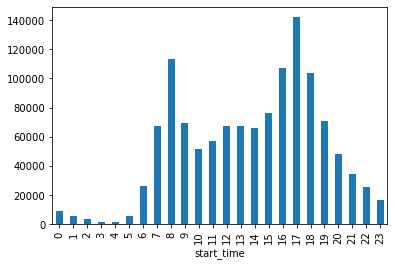

In [39]:
df['start_time'].groupby([df['start_time'].dt.hour]).count().plot(kind="bar")#.get_legend().remove()
#ALLE ZUSAMMEN

In [40]:
df['true_montag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Montag'), axis = 1))
df['true_dienstag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Dienstag'), axis = 1))
df['true_mittwoch'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Mittwoch'), axis = 1))
df['true_donnerstag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Donnerstag'), axis = 1))
df['true_freitag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Freitag'), axis = 1))
df['true_samstag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Samstag'), axis = 1))
df['true_sonntag'] = (df.apply(lambda x: getTrueWeekday(x.weekday_start, 'Sonntag'), axis = 1))

In [41]:
mo = df.where(lambda x: (x.true_montag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
di = df.where(lambda x: (x.true_dienstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
mi = df.where(lambda x: (x.true_mittwoch == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
do = df.where(lambda x: (x.true_donnerstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
fr = df.where(lambda x: (x.true_freitag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
sa = df.where(lambda x: (x.true_samstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()
so = df.where(lambda x: (x.true_sonntag == True), axis = 0).groupby([df['start_time'].dt.hour]).count()

In [42]:
montag = []
dienstag = []
mittwoch = []
donnerstag = []
freitag = []
samstag = []
sonntag = []
for i in range(0, 24):
    montag.append(mo['start_time'][i])
    dienstag.append(di['start_time'][i])
    mittwoch.append(mi['start_time'][i])
    donnerstag.append(do['start_time'][i])
    freitag.append(fr['start_time'][i])
    samstag.append(sa['start_time'][i])
    sonntag.append(so['start_time'][i])


In [43]:
df_hourly_amount_per_day = {'Montag':[montag[0],montag[1],montag[2],montag[3],montag[4],montag[5],montag[6],montag[7],
                              montag[8],montag[9],montag[10],montag[11],montag[12],montag[13],montag[14],montag[15],
                                      montag[16],montag[17],montag[18],montag[19],
                              montag[20],montag[21],montag[22],montag[23]],
                            
                            'Dienstag':[dienstag[0],dienstag[1],dienstag[2],dienstag[3],dienstag[4],dienstag[5],dienstag[6],dienstag[7],
                              dienstag[8],dienstag[9],dienstag[10],dienstag[11],dienstag[12],dienstag[13],dienstag[14],dienstag[15],
                                      dienstag[16],dienstag[17],dienstag[18],dienstag[19],
                              dienstag[20],dienstag[21],dienstag[22],dienstag[23]],
                            
                            'Mittwoch':[mittwoch[0],mittwoch[1],mittwoch[2],mittwoch[3],mittwoch[4],mittwoch[5],mittwoch[6],mittwoch[7],
                              mittwoch[8],mittwoch[9],mittwoch[10],mittwoch[11],mittwoch[12],mittwoch[13],mittwoch[14],mittwoch[15],
                                      mittwoch[16],mittwoch[17],mittwoch[18],mittwoch[19],
                              mittwoch[20],mittwoch[21],mittwoch[22],mittwoch[23]],
                            
                            'Donnerstag':[donnerstag[0],donnerstag[1],donnerstag[2],donnerstag[3],donnerstag[4],donnerstag[5],donnerstag[6],donnerstag[7],
                              donnerstag[8],donnerstag[9],donnerstag[10],donnerstag[11],donnerstag[12],donnerstag[13],donnerstag[14],donnerstag[15],
                                      donnerstag[16],donnerstag[17],donnerstag[18],donnerstag[19],
                              donnerstag[20],donnerstag[21],donnerstag[22],donnerstag[23]],
                            
                            'Freitag':[freitag[0],freitag[1],freitag[2],freitag[3],freitag[4],freitag[5],freitag[6],freitag[7],
                              freitag[8],freitag[9],freitag[10],freitag[11],freitag[12],freitag[13],freitag[14],freitag[15],
                                      freitag[16],freitag[17],freitag[18],freitag[19],
                              freitag[20],freitag[21],freitag[22],freitag[23]],
                            
                            'Samstag':[samstag[0],samstag[1],samstag[2],samstag[3],samstag[4],samstag[5],samstag[6],samstag[7],
                              samstag[8],samstag[9],samstag[10],samstag[11],samstag[12],samstag[13],samstag[14],samstag[15],
                                      samstag[16],samstag[17],samstag[18],samstag[19],
                              samstag[20],samstag[21],samstag[22],samstag[23]],
                            
                            'Sonntag':[sonntag[0],sonntag[1],sonntag[2],sonntag[3],sonntag[4],sonntag[5],sonntag[6],sonntag[7],
                              sonntag[8],sonntag[9],sonntag[10],sonntag[11],sonntag[12],sonntag[13],sonntag[14],sonntag[15],
                                      sonntag[16],sonntag[17],sonntag[18],sonntag[19],
                              sonntag[20],sonntag[21],sonntag[22],sonntag[23]],
                            
                            'Zeitraum':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]}

In [44]:
df_hourly_amount_per_day = pd.DataFrame(data = df_hourly_amount_per_day)

Text(0.5, 1.0, 'Monday')

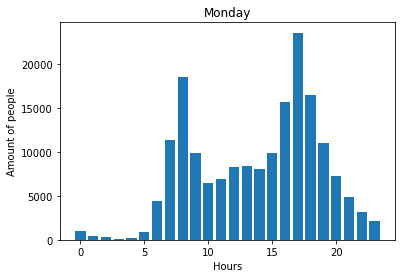

In [46]:
#Montag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Montag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

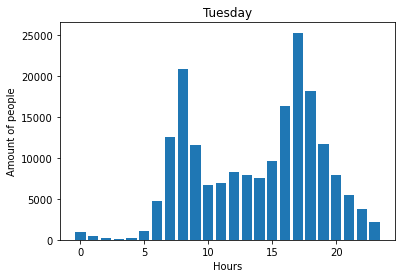

In [47]:
#Dienstag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Dienstag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

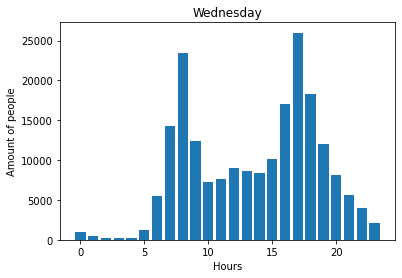

In [48]:
#Mittwoch
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Mittwoch'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

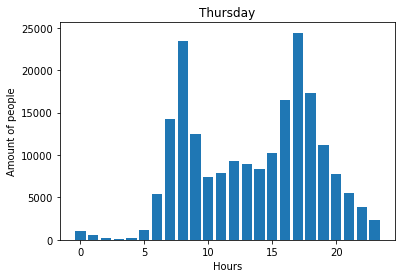

In [49]:
#Donnerstag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Donnerstag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Thursday')

Text(0.5, 1.0, 'Friday')

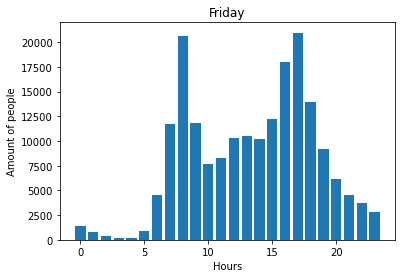

In [50]:
#Freitag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Freitag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

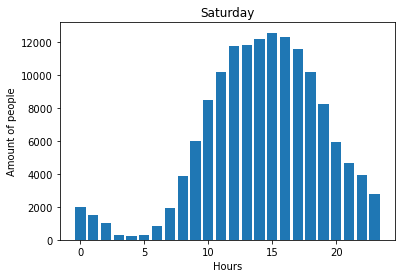

In [51]:
#Samstag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Samstag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

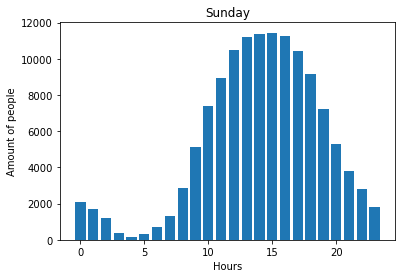

In [52]:
#Sonntag
plt.bar(df_hourly_amount_per_day['Zeitraum'],df_hourly_amount_per_day['Sonntag'])
plt.xlabel('Hours')
plt.ylabel('Amount of people')
plt.title('Sunday')

In [53]:
#EINZELNE TAGE
#df.where(lambda x: (x.true_montag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_dienstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_mittwoch == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_donnerstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_freitag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_samstag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()
#df.where(lambda x: (x.true_sonntag == True), axis = 0).groupby([df['start_time'].dt.hour]).count().plot(kind="bar").get_legend().remove()

In [54]:
df['month'] = df.apply(lambda x: get_month(x.start_time), axis = 1)
m = []
for i in range(1, 13):
    m.append(df.where(lambda x: (x.month == i), axis = 0).count())

In [55]:
df_monthly_amount = {'Amount':[m[0][0],m[1][1],m[2][2],m[3][3],m[4][4],m[5][5],m[6][6],m[7][7],
                              m[8][8],m[9][9],m[10][10],m[11][11]],'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                                         'Oct', 'Nov', 'Dec']}

In [56]:
df.drop(['month'], axis=1, inplace=True)

In [57]:
df_monthly_amount = pd.DataFrame(data = df_monthly_amount)

Text(0.5, 1.0, 'Amount of people riding bluebikes per month')

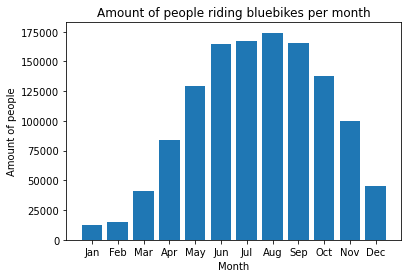

In [59]:
plt.bar(df_monthly_amount['Month'],df_monthly_amount['Amount'])
plt.xlabel('Month')
plt.ylabel('Amount of people')
plt.title('Amount of people riding bluebikes per month')

In [60]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
# Drop Trips with the 8D OPS stations
df.drop([598580], axis=0, inplace=True)
df.drop([598729], axis=0, inplace=True)
df.drop([1072609], axis=0, inplace=True)
#########################################

# Löschen alle die schneller als 30km/h sind
df.drop([88647], axis=0, inplace=True)
df.drop([88649], axis=0, inplace=True)
df.drop([17997], axis=0, inplace=True)
df.drop([89416], axis=0, inplace=True)
df.drop([824312], axis=0, inplace=True)
df.drop([1143845], axis=0, inplace=True)
#########################################

# Löschen alle die speed < 0 haben
df.drop([1114233], axis=0, inplace=True)
df.drop([1114235], axis=0, inplace=True)
df.drop([1114234], axis=0, inplace=True)
#########################################

# Löscht alle Roundtrips - machen wa doch nicht 
#df = df.drop(df[df['Distance (KM)'] == 0].index)
# Löscht alle Trips die länger als 8Std sind
df = df.drop(df[df['Duration (Seconds)'] > 28800].index)
# Löscht alle Trips die kürzer als 1min sind - gibt keine die kürzer als 61sek sind :)
#df = df.drop(df[df['Duration (Seconds)'] <= 60].index)

In [61]:
df.rename(columns = {'Duration (Seconds)':'Duration_Seconds'}, inplace = True)

**Adding parameters to visualize the duration a bike was used per minutes**

Since we got our duration in seconds to be more precise, we need the minutes now so our plot won't look as bad as with seconds.

Furthermore we round the minutes to the nearest 10. This means, that the graph shows us the the time duration in steps (0 - 10, 10 - 20, 20 - 30, and so on.

In [62]:
df['Minutes'] = df['Duration_Seconds'] / 60

To round all of our entries in the dataframe we write a function to get the next 10 with a lambda operation.

In [88]:
def roundTo10(number):
    return round(number/10)*10

In [63]:
df['Minutes_rounded'] = df.apply(lambda x: roundTo10(x.Minutes), axis = 1)

Afterards we convert all of the unique entries into an array.
The array is later used to create a new dataframe.

In [64]:
array = df['Minutes_rounded'].unique()

The second Array we are creating now is used for the the amount of people.

In [65]:
array2 = []
for i in df['Minutes_rounded'].unique():
    test = df.where(lambda x: (x.Minutes_rounded == i), axis = 0).count()
    array2.append(test[0])

Since we don't need the Minutes and Minutes_rounded column anymore, we can drop it.

In [87]:
df.drop(["Minutes", 'Minutes_rounded'], axis=1, inplace=True)

From this point on we create a new dataframe.

Also we are spliting the dataframe in 2 sublets so visiulize the amount even better.

In [66]:
df_alle_minuten = {'unique_minutes':[array[0],array[1],array[2],array[3],array[4],array[5],array[6],array[7],
                              array[8],array[9],array[10],array[11],array[12],array[13],array[14],array[15],array[16],array[17],array[18],array[19],
                              array[20],array[21],array[22],array[23],array[24],array[25],array[26],array[27],array[28],array[29],array[30],array[31],
                              array[32],array[32],array[33],array[34],array[35],array[36],array[37],array[38],array[39],array[40],array[41],array[42],
                              array[43],array[44],array[45],array[46], array[47], array[48]],'people':[array2[0],array2[1],array2[2],array2[3],array[4],array[5],array[6],array[7],
                              array2[8],array2[9],array2[10],array2[11],array2[12],array2[13],array2[14],array2[15],array2[16],array2[17],array2[18],array2[19],
                              array2[20],array2[21],array2[22],array2[23],array2[24],array2[25],array2[26],array2[27],array2[28],array2[29],array2[30],array2[31],
                              array2[32],array2[32],array2[33],array2[34],array2[35],array2[36],array2[37],array2[38],array2[39],array2[40],array2[41],array2[42],
                              array2[43],array2[44],array2[45],array2[46], array2[47], array2[48]]}

In [67]:
df_alle_minuten = pd.DataFrame(data = df_alle_minuten)

In [89]:
df_alle_minuten

,unique_minutes,people
3,0,171645
2,10,651119
1,20,272797
0,30,81854
10,40,21417
11,50,10465
12,60,6185
19,70,3859
9,80,2796
8,90,2155


In [69]:
df_große_minuten = df_alle_minuten

In [70]:
df_kleine_minuten = df_alle_minuten

In [71]:
df_alle_minuten.sort_values(['unique_minutes'],axis=0, ascending=True,inplace=True,na_position='first')

In [72]:
df_große_minuten = df_große_minuten.drop(df_große_minuten[df_große_minuten['unique_minutes'] > 50].index)

In [73]:
df_kleine_minuten = df_kleine_minuten.drop(df_kleine_minuten[df_kleine_minuten['unique_minutes'] < 60].index)

Now that we have our dataframe with values assigned to the minutes, we can use those to create 3 individual Plots.

Text(0, 0.5, 'Amount of people')

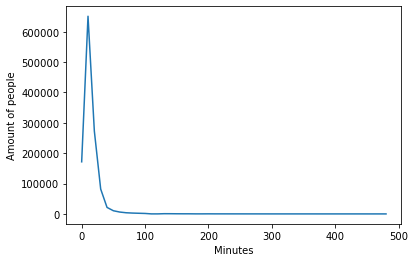

In [80]:
plt.plot(df_alle_minuten['unique_minutes'],df_alle_minuten['people'])
plt.xlabel('Minutes')
plt.ylabel('Amount of people')

Text(0, 0.5, 'Amount of people')

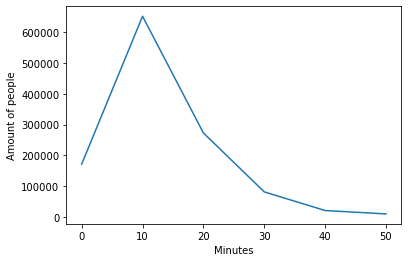

In [75]:
plt.plot(df_große_minuten['unique_minutes'],df_große_minuten['people'])
plt.xlabel('Minutes')
plt.ylabel('Amount of people')

Text(0, 0.5, 'Amount of people')

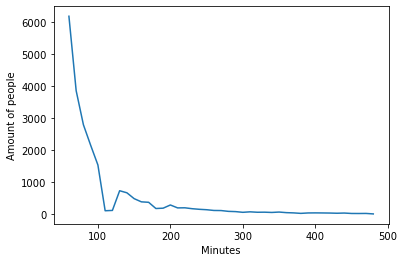

In [76]:
plt.plot(df_kleine_minuten['unique_minutes'],df_kleine_minuten['people'])
plt.xlabel('Minutes')
plt.ylabel('Amount of people')

As you can see the majority of people are using the bike for around 10 - 20 minutes.

